In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4i/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4i/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.0,0.938754,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.561414,...,0,25,0.000000,0.000000,0,,0,,0.500000,YES
1,0.0,1.624541,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,2.706102,...,0,25,0.600000,0.000000,0,,0,,0.333333,NO
2,0.0,1.894108,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.375355,...,0,19,0.200000,0.000000,0,,0,,0.250000,UNKNOWN
3,0.0,1.989939,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.503376,...,0,32,1.000000,0.000000,0,,0,,0.333333,YES
4,0.0,1.949269,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,3.631440,...,0,13,0.400000,0.000000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.0,1.905533,1.781937,3.849615,0.00377,0.329502,0.102195,0.500263,0.500263,3.587219,...,1,15,0.400000,0.196467,0,,0,,0.500000,UNKNOWN
796,0.0,1.995499,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.165892,...,0,22,0.777778,0.000000,0,,0,,0.666667,YES
797,0.0,1.491480,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,3.157142,...,0,19,0.666667,0.000000,0,,0,,0.500000,UNKNOWN
798,0.0,1.650882,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,3.808481,...,0,21,1.000000,0.000000,0,,0,,1.000000,NO


<Axes: title={'center': 'nlp_semantics'}, xlabel='clases'>

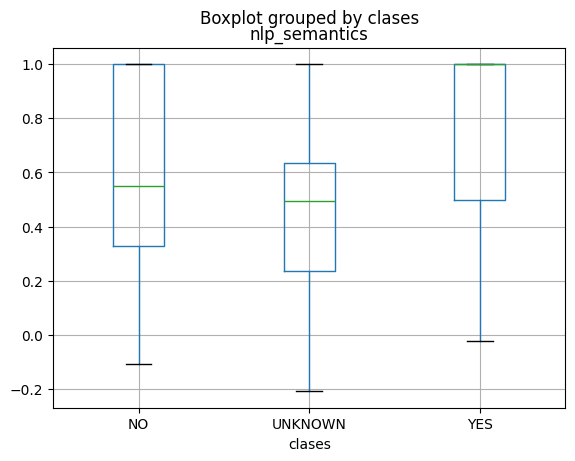

In [4]:
train.boxplot(by="clases",column="nlp_semantics")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.0,0.938754,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.561414,...,0,25,0.000000,0.000000,0,,0,,0.500000,YES
1,0.0,1.624541,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,2.706102,...,0,25,0.600000,0.000000,0,,0,,0.333333,NO
2,0.0,1.894108,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.375355,...,0,19,0.200000,0.000000,0,,0,,0.250000,UNKNOWN
3,0.0,1.989939,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.503376,...,0,32,1.000000,0.000000,0,,0,,0.333333,YES
4,0.0,1.949269,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,3.631440,...,0,13,0.400000,0.000000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.0,1.905533,1.781937,3.849615,0.00377,0.329502,0.102195,0.500263,0.500263,3.587219,...,1,15,0.400000,0.196467,0,,0,,0.500000,UNKNOWN
796,0.0,1.995499,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,4.165892,...,0,22,0.777778,0.000000,0,,0,,0.666667,YES
797,0.0,1.491480,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,3.157142,...,0,19,0.666667,0.000000,0,,0,,0.500000,UNKNOWN
798,0.0,1.650882,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,3.808481,...,0,21,1.000000,0.000000,0,,0,,1.000000,NO


In [6]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'verbT', 'negH', 'verbH',
       'overlap_ent', 'clases'],
      dtype='object')

In [7]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
train["mutinf"]=train["mutinf_t"]-train["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
train["max_info"]=train["max_info_t"]-train["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
train["entropias"]=train["entropia_total"]-train["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
train["sumas"]=train["sumas_t"]-train["sumas"]
train["list_m"]=train["list_m"]/train["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]

In [8]:
train=train.drop(["verbT","verbH"],axis=1)

In [9]:
train = train[['negH','negT','mutinf','max_info','list_comp', 'list_incomp', 'rel_conceptuales','diferencias','entropia_relaciones','nlp_semantics','overlap_ent','Jaro-Winkler_rit','clases']]

In [10]:
train

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases
0,0,0,1.561414,0.333333,0,0,0,0.000000,0.000000,1.000000,0.500000,0.000000,YES
1,0,0,2.706102,0.504683,1,0,0,0.000000,0.000000,1.000000,0.333333,0.600000,NO
2,0,0,4.375355,0.802840,2,0,0,0.000000,0.000000,1.000000,0.250000,0.200000,UNKNOWN
3,0,0,4.503376,1.000000,0,0,0,0.000000,0.000000,1.000000,0.333333,1.000000,YES
4,0,0,3.631440,0.676320,1,0,0,0.000000,0.000000,1.000000,0.666667,0.400000,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,-0.262397,0.336399,0,0,0,0.066667,0.721928,0.500263,0.500000,0.400000,UNKNOWN
796,0,0,4.165892,0.888889,0,0,0,0.000000,0.000000,1.000000,0.666667,0.777778,YES
797,0,0,3.157142,0.666667,0,0,0,0.000000,0.000000,1.000000,0.500000,0.666667,UNKNOWN
798,0,0,3.808481,0.800000,0,0,0,0.000000,0.000000,1.000000,1.000000,1.000000,NO


In [11]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [12]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [13]:
train_m

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit
negH,1.000000,0.091520,-0.060730,-0.057157,-0.035240,0.101964,-0.013184,0.012526,0.040421,-0.020183,0.046459,0.034834
negT,0.091520,1.000000,0.036439,0.038774,0.010319,-0.010385,-0.012666,-0.047766,-0.062397,0.084263,0.044363,0.079997
mutinf,-0.060730,0.036439,1.000000,0.891242,-0.219463,-0.029767,-0.105064,-0.627202,-0.734502,0.648401,0.316159,0.381064
max_info,-0.057157,0.038774,0.891242,1.000000,-0.374331,-0.081406,-0.209310,-0.630264,-0.722730,0.563186,0.432437,0.466657
list_comp,-0.035240,0.010319,-0.219463,-0.374331,1.000000,-0.000572,0.140452,0.218117,0.174273,-0.102945,-0.341990,-0.130022
list_incomp,0.101964,-0.010385,-0.029767,-0.081406,-0.000572,1.000000,0.216779,0.092786,0.274226,-0.078730,-0.023925,-0.056680
rel_conceptuales,-0.013184,-0.012666,-0.105064,-0.209310,0.140452,0.216779,1.000000,0.177245,0.605049,-0.283104,-0.220810,-0.271060
diferencias,0.012526,-0.047766,-0.627202,-0.630264,0.218117,0.092786,0.177245,1.000000,0.602294,-0.440417,-0.302521,-0.355242
entropia_relaciones,0.040421,-0.062397,-0.734502,-0.722730,0.174273,0.274226,0.605049,0.602294,1.000000,-0.756938,-0.374595,-0.463929
nlp_semantics,-0.020183,0.084263,0.648401,0.563186,-0.102945,-0.078730,-0.283104,-0.440417,-0.756938,1.000000,0.289722,0.328981


<Axes: >

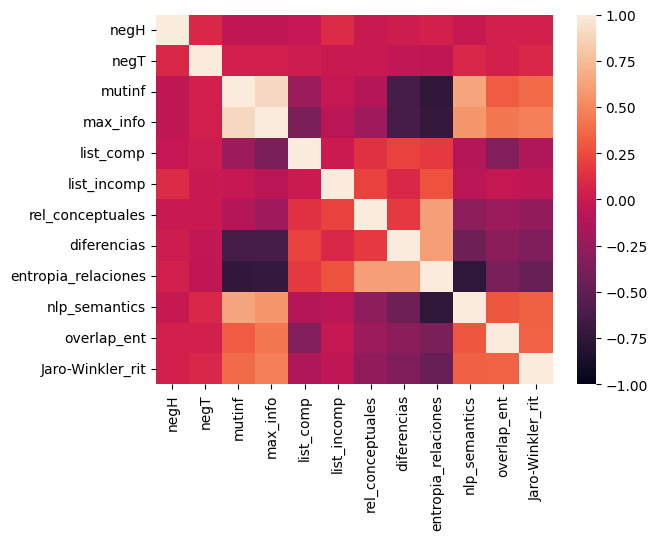

In [14]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [15]:
train_m

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit
negH,1.000000,0.091520,-0.060730,-0.057157,-0.035240,0.101964,-0.013184,0.012526,0.040421,-0.020183,0.046459,0.034834
negT,0.091520,1.000000,0.036439,0.038774,0.010319,-0.010385,-0.012666,-0.047766,-0.062397,0.084263,0.044363,0.079997
mutinf,-0.060730,0.036439,1.000000,0.891242,-0.219463,-0.029767,-0.105064,-0.627202,-0.734502,0.648401,0.316159,0.381064
max_info,-0.057157,0.038774,0.891242,1.000000,-0.374331,-0.081406,-0.209310,-0.630264,-0.722730,0.563186,0.432437,0.466657
list_comp,-0.035240,0.010319,-0.219463,-0.374331,1.000000,-0.000572,0.140452,0.218117,0.174273,-0.102945,-0.341990,-0.130022
list_incomp,0.101964,-0.010385,-0.029767,-0.081406,-0.000572,1.000000,0.216779,0.092786,0.274226,-0.078730,-0.023925,-0.056680
rel_conceptuales,-0.013184,-0.012666,-0.105064,-0.209310,0.140452,0.216779,1.000000,0.177245,0.605049,-0.283104,-0.220810,-0.271060
diferencias,0.012526,-0.047766,-0.627202,-0.630264,0.218117,0.092786,0.177245,1.000000,0.602294,-0.440417,-0.302521,-0.355242
entropia_relaciones,0.040421,-0.062397,-0.734502,-0.722730,0.174273,0.274226,0.605049,0.602294,1.000000,-0.756938,-0.374595,-0.463929
nlp_semantics,-0.020183,0.084263,0.648401,0.563186,-0.102945,-0.078730,-0.283104,-0.440417,-0.756938,1.000000,0.289722,0.328981


In [16]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [17]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [18]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

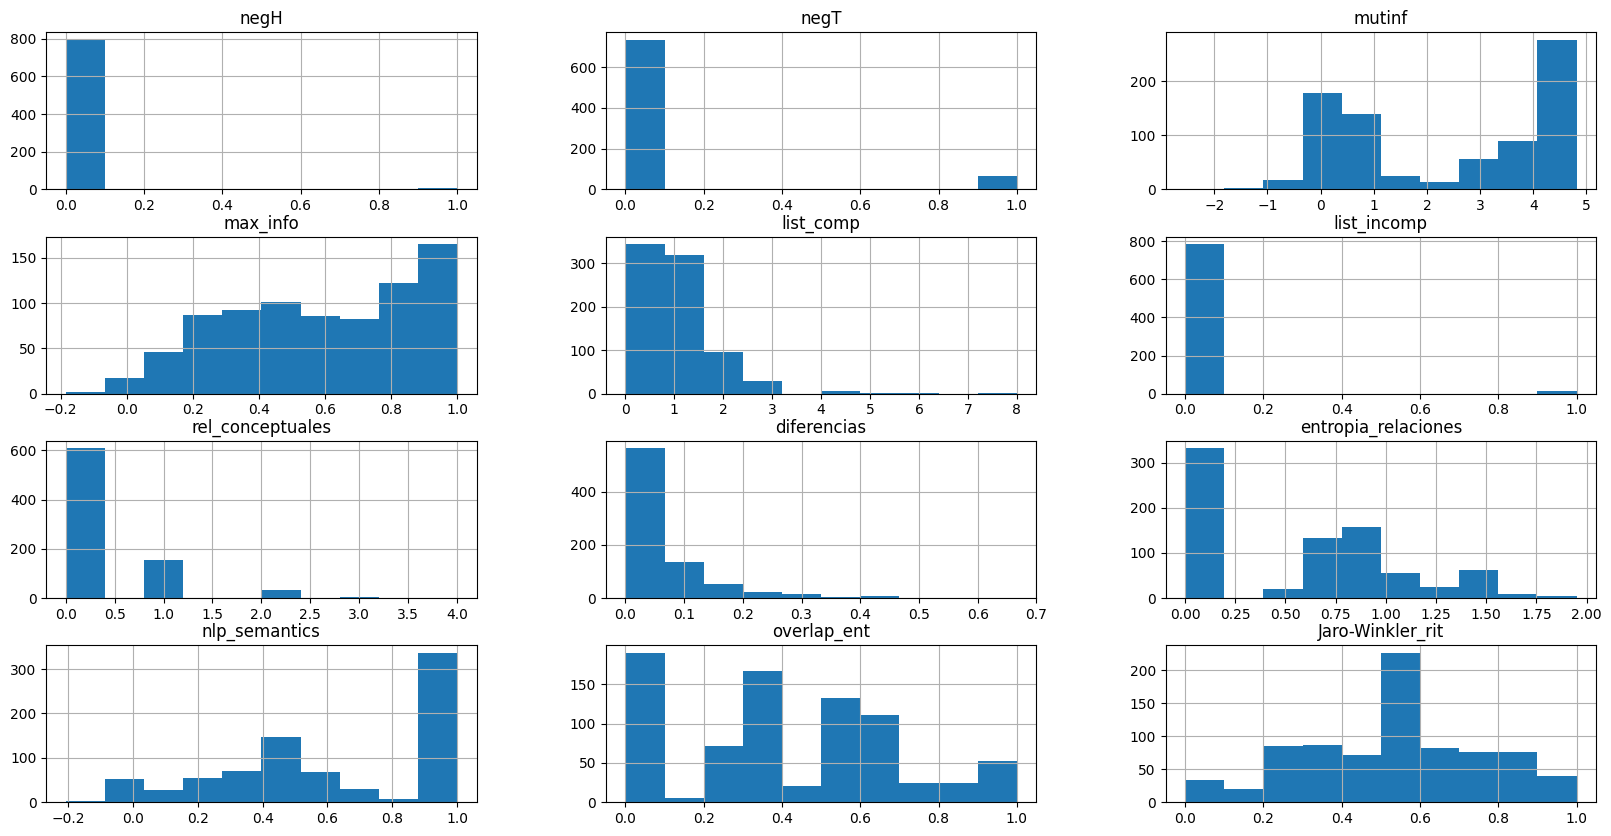

In [19]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [20]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4i/GHS/GHS_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4i/GHS/GHS_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [21]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,1.949972,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.427003,...,0,17,1.000000,0.000000,0,,0,,0.666667,ENTAILMENT
1,1.199543,1.657304,1.679081,3.171351,0.012397,0.183204,0.047735,0.636035,0.636035,3.542269,...,11,9,0.100000,0.011044,0,,0,,0.000000,NONENTAILMENT
2,1.255030,1.718781,1.645894,3.968915,0.004847,0.208687,0.032895,0.491652,0.491652,4.088620,...,6,17,0.307692,0.049646,0,,0,,0.000000,NONENTAILMENT
3,0.000000,1.994809,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.682101,...,0,12,0.500000,0.000000,0,,0,,0.000000,ENTAILMENT
4,1.235774,1.787912,1.712318,3.858139,0.004450,0.231445,0.048280,0.506949,0.506949,3.888264,...,14,10,0.173913,0.021538,0,,0,,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.769230,1.550637,1.315269,3.066244,0.003068,0.129983,0.028223,0.494990,0.494990,3.463129,...,13,19,0.157895,0.025493,0,,0,,0.166667,NONENTAILMENT
796,0.999991,1.808203,1.682003,3.928277,0.005371,0.199537,0.024833,0.217854,0.217854,4.375612,...,1,27,0.714286,0.172806,0,,0,,0.250000,ENTAILMENT
797,1.212573,1.709231,1.455906,3.145553,0.011558,0.167745,0.024309,0.598749,0.598749,3.469695,...,11,16,0.111111,0.051493,0,,0,,0.000000,NONENTAILMENT
798,1.101852,1.964886,1.826439,3.428138,0.007745,0.326073,0.044634,0.551172,0.551172,3.693746,...,10,18,0.157895,0.038811,0,,1,do,0.090909,NONENTAILMENT


In [22]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
test["mutinf"]=test["mutinf_t"]-test["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
test["max_info"]=test["max_info_t"]-test["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
test["entropias"]=test["entropia_total"]-test["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
test["sumas"]=test["sumas_t"]-test["sumas"]
test["list_m"]=test["list_m"]/test["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,semantics,nlp_semantics,mutinf_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,1.949972,1.949972,4.427003,0.000000,0.848833,0.107360,1.000000,1.000000,4.427003,...,0.000000,17,1.000000,0.000000,0,,0,,0.666667,ENTAILMENT
1,1.199543,1.657304,-0.021777,0.370918,0.012397,0.035099,0.006005,0.636035,0.636035,3.542269,...,0.550000,9,0.100000,0.011044,0,,0,,0.000000,NONENTAILMENT
2,1.255030,1.718781,0.072886,0.119705,0.004847,0.200193,0.021051,0.491652,0.491652,4.088620,...,0.461538,17,0.307692,0.049646,0,,0,,0.000000,NONENTAILMENT
3,0.000000,1.994809,1.994809,3.682101,0.000000,0.701110,0.114882,1.000000,1.000000,3.682101,...,0.000000,12,0.500000,0.000000,0,,0,,0.000000,ENTAILMENT
4,1.235774,1.787912,0.075594,0.030125,0.004450,0.043378,0.012020,0.506949,0.506949,3.888264,...,0.608696,10,0.173913,0.021538,0,,0,,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.769230,1.550637,0.235368,0.396886,0.003068,0.156905,0.014078,0.494990,0.494990,3.463129,...,0.684211,19,0.157895,0.025493,0,,0,,0.166667,NONENTAILMENT
796,0.999991,1.808203,0.126200,0.447334,0.005371,0.484279,0.045124,0.217854,0.217854,4.375612,...,0.142857,27,0.714286,0.172806,0,,0,,0.250000,ENTAILMENT
797,1.212573,1.709231,0.253325,0.324143,0.011558,0.092509,0.018592,0.598749,0.598749,3.469695,...,0.611111,16,0.111111,0.051493,0,,0,,0.000000,NONENTAILMENT
798,1.101852,1.964886,0.138447,0.265608,0.007745,0.081563,0.009639,0.551172,0.551172,3.693746,...,0.526316,18,0.157895,0.038811,0,,1,do,0.090909,NONENTAILMENT


In [23]:
#test=test.drop(["verbT","verbH"],axis=1)

In [24]:
test = test[['negH','negT','mutinf','max_info','list_comp', 'list_incomp', 'rel_conceptuales','diferencias','entropia_relaciones','nlp_semantics','overlap_ent','Jaro-Winkler_rit','clases']]

In [25]:
test

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases
0,0,0,4.427003,0.848833,2,0,0,0.000000,0.000000,1.000000,0.666667,1.000000,ENTAILMENT
1,0,0,0.370918,0.035099,7,0,1,1.222222,1.219241,0.636035,0.000000,0.100000,NONENTAILMENT
2,0,0,0.119705,0.200193,4,0,1,0.352941,1.314320,0.491652,0.000000,0.307692,NONENTAILMENT
3,0,0,3.682101,0.701110,2,0,0,0.000000,0.000000,1.000000,0.000000,0.500000,ENTAILMENT
4,0,0,0.030125,0.043378,6,0,2,1.400000,1.264673,0.506949,0.000000,0.173913,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0.396886,0.156905,1,0,2,0.684211,1.189732,0.494990,0.166667,0.157895,NONENTAILMENT
796,0,0,0.447334,0.484279,2,0,0,0.037037,0.591673,0.217854,0.250000,0.714286,ENTAILMENT
797,0,0,0.324143,0.092509,4,0,2,0.687500,1.299737,0.598749,0.000000,0.111111,NONENTAILMENT
798,1,0,0.265608,0.081563,4,0,3,0.555556,1.432983,0.551172,0.090909,0.157895,NONENTAILMENT


In [26]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [27]:
# RTE3
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [28]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [29]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.32427622, ..., 1.        , 0.5       ,
        0.        ],
       [0.        , 0.        , 0.56200638, ..., 1.        , 0.33333333,
        0.6       ],
       [0.        , 0.        , 0.90867873, ..., 1.        , 0.25      ,
        0.2       ],
       ...,
       [0.        , 0.        , 0.65567897, ..., 1.        , 0.5       ,
        0.66666667],
       [0.        , 0.        , 0.79094968, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.92913245, ..., 1.        , 0.66666667,
        0.4       ]])

In [30]:
X_train.shape

(800, 12)

In [31]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [32]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [33]:
model.decision_function(X_train)

array([ 0.78959251,  0.80000685,  0.76281543,  1.32362449,  1.11464592,
        1.52526633,  1.04501855, -1.69633657,  0.75288804, -1.06365197,
       -0.26911949,  1.2044894 ,  1.23931596, -0.46178096, -0.42169961,
        1.04741261,  0.46809617,  1.21641749, -1.14904462, -0.17422365,
        1.45656671, -0.05655639,  0.10644165,  1.08549579,  1.1296412 ,
        1.24653035,  1.31908723, -0.28964126,  0.64583732,  0.21988589,
        0.97765887,  0.97606615,  1.01269696,  0.83407835, -0.15913185,
        0.89238798,  1.04357533,  1.06723414, -0.66323587,  1.23629218,
        0.73828286, -0.57484759,  0.75919761,  0.94462401, -0.80091901,
        1.04939352,  1.01481019,  1.27193076,  1.08429899,  0.98170864,
       -0.92327528,  0.83223367, -0.78994506,  1.68231787,  0.98955276,
        1.080638  ,  1.10184509,  1.00703846,  0.99177936, -0.27549114,
        0.79519927, -0.24376297,  1.2716865 ,  0.57818694,  1.19144081,
        1.12995732,  0.90828281, -0.13656763,  1.13616618, -0.98

In [34]:
labels=train.columns[:-1]
labels

Index(['negH', 'negT', 'mutinf', 'max_info', 'list_comp', 'list_incomp',
       'rel_conceptuales', 'diferencias', 'entropia_relaciones',
       'nlp_semantics', 'overlap_ent', 'Jaro-Winkler_rit'],
      dtype='object')

In [35]:
model.classes_

array([0, 1])

In [36]:
model.coef_[0]

array([-0.08647442, -0.21664995, -0.79381098,  1.41689983, -0.28190333,
        0.16306837,  0.6412866 , -2.02372833, -2.07451067,  0.66641854,
        0.79628523,  0.20715712])

In [37]:
coeficientes=model.coef_[0]

In [38]:
coeficientes

array([-0.08647442, -0.21664995, -0.79381098,  1.41689983, -0.28190333,
        0.16306837,  0.6412866 , -2.02372833, -2.07451067,  0.66641854,
        0.79628523,  0.20715712])

In [39]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  3 max_info 8 entropia_relaciones


In [40]:
n_columns=train.shape[1]-1

In [41]:
n_columns

12

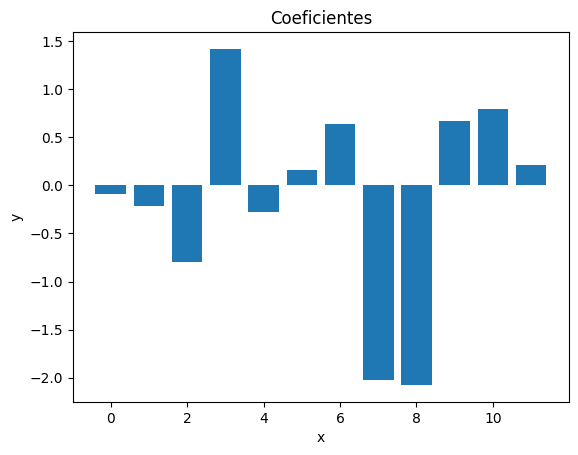

In [42]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [43]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.92984473, ..., 1.        , 0.66666667,
        1.        ],
       [0.        , 0.        , 0.07790746, ..., 0.63603458, 0.        ,
        0.1       ],
       [0.        , 0.        , 0.02514272, ..., 0.49165207, 0.        ,
        0.30769231],
       ...,
       [0.        , 0.        , 0.06808273, ..., 0.59874903, 0.        ,
        0.11111111],
       [1.        , 0.        , 0.05578816, ..., 0.55117207, 0.09090909,
        0.15789474],
       [0.        , 0.        , 0.01535297, ..., 0.60686176, 0.16666667,
        0.33333333]])

In [44]:
X_test.shape

(800, 12)

In [45]:
predictions = model.predict(X_test)

In [46]:
predictions

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,

In [47]:
test["predicciones"]=predictions
test

/tmp/ipykernel_3519811/792236476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicciones"]=predictions


,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases,predicciones
0,0,0,4.427003,0.848833,2,0,0,0.000000,0.000000,1.000000,0.666667,1.000000,ENTAILMENT,1
1,0,0,0.370918,0.035099,7,0,1,1.222222,1.219241,0.636035,0.000000,0.100000,NONENTAILMENT,0
2,0,0,0.119705,0.200193,4,0,1,0.352941,1.314320,0.491652,0.000000,0.307692,NONENTAILMENT,0
3,0,0,3.682101,0.701110,2,0,0,0.000000,0.000000,1.000000,0.000000,0.500000,ENTAILMENT,1
4,0,0,0.030125,0.043378,6,0,2,1.400000,1.264673,0.506949,0.000000,0.173913,NONENTAILMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0.396886,0.156905,1,0,2,0.684211,1.189732,0.494990,0.166667,0.157895,NONENTAILMENT,0
796,0,0,0.447334,0.484279,2,0,0,0.037037,0.591673,0.217854,0.250000,0.714286,ENTAILMENT,0
797,0,0,0.324143,0.092509,4,0,2,0.687500,1.299737,0.598749,0.000000,0.111111,NONENTAILMENT,0
798,1,0,0.265608,0.081563,4,0,3,0.555556,1.432983,0.551172,0.090909,0.157895,NONENTAILMENT,0


In [48]:
incorrectos = test[(test["clases"]=="ENTAILMENT") & (test["predicciones"]==0)]
incorrectos

,negH,negT,mutinf,max_info,list_comp,list_incomp,rel_conceptuales,diferencias,entropia_relaciones,nlp_semantics,overlap_ent,Jaro-Winkler_rit,clases,predicciones
10,0,0,0.391824,0.411076,1,0,1,0.045455,1.251629,0.404058,0.000000,0.500000,ENTAILMENT,0
11,0,0,0.410952,0.394915,0,0,0,0.133333,0.970951,0.282536,0.666667,0.400000,ENTAILMENT,0
12,0,0,3.423363,0.596694,1,0,1,0.000000,0.721928,0.500000,0.000000,0.400000,ENTAILMENT,0
15,0,0,0.480576,0.313264,0,0,0,0.222222,1.000000,0.574351,0.000000,0.000000,ENTAILMENT,0
16,0,0,-0.191697,0.182777,3,0,1,0.095238,1.156780,0.470589,0.400000,0.600000,ENTAILMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,0,0,-0.600763,0.093734,0,0,0,0.200000,0.970951,0.618563,0.250000,0.400000,ENTAILMENT,0
791,0,0,0.388997,0.582583,0,0,0,0.062500,0.811278,0.241262,0.333333,0.000000,ENTAILMENT,0
793,0,0,-0.764346,0.145300,1,0,0,0.041667,0.811278,0.057242,0.000000,0.500000,ENTAILMENT,0
794,0,0,0.285300,0.459656,2,0,0,0.045455,0.721928,0.286841,0.000000,0.200000,ENTAILMENT,0


In [49]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[182 217]
 [  3 398]]


In [50]:
# [[192 207]
#  [  4 397]]
#[[255 144]
# [  5 396]]
# 
#[[222 177]
# [  4 397]]
# 163  236
# 2   399
# 
# [[142 257]
#  [  3 398]]
# [[221 178]
#  [  2 399]]
# acccuracy:  0.78
# precision:  0.99
# recall 0.55
# f1_score:  0.71
# matthews_score:  0.61

In [51]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.72
precision:  0.98
recall 0.46
f1_score:  0.62
matthews_score:  0.53


In [52]:
# acccuracy:  0.78
# precision:  1.0
# recall 0.57
# f1_score:  0.73
# matthews_score:  0.63
# acccuracy:  0.8
# precision:  0.98
# recall 0.6
# f1_score:  0.75
# matthews_score:  0.64

In [53]:
X_train.shape

(800, 12)

In [54]:
X_test.shape

(800, 12)

In [55]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [56]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [57]:
kfold = model_selection.KFold(n_splits=10,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')

In [58]:
print(cv_results)
print(round(cv_results.mean(),2))
print(round(cv_results.std(),2))

[0.7875  0.8125  0.74375 0.83125 0.83125 0.84375 0.81875 0.79375 0.80625
 0.85625]
0.81
0.03


In [59]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.830000 (0.169834)
Logistic Regression Recall:: 0.840000 (0.058629)
Logistic Regression F1-score:: 0.820000 (0.078573)


In [60]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.620000 (0.253513)


In [61]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.820000 (0.112502)
Logistic Regression Recall:: 0.800000 (0.119236)
Logistic Regression F1-score:: 0.790000 (0.142158)


In [62]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.800000 (0.119236)
Logistic Regression Recall:: 0.800000 (0.119236)
Logistic Regression F1-score:: 0.800000 (0.119236)


In [63]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.820000 (0.112180)
Logistic Regression Recall:: 0.800000 (0.122111)
Logistic Regression F1-score:: 0.790000 (0.143807)


In [64]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [65]:
#linear_model

In [66]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [67]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))
print(confusion_matrix( y_test,y_predict,labels=[1,0]))

              precision    recall  f1-score   support

           0       0.65      0.99      0.78       401
           1       0.98      0.46      0.62       399

    accuracy                           0.73       800
   macro avg       0.82      0.72      0.70       800
weighted avg       0.82      0.72      0.70       800

[[182 217]
 [  3 398]]


In [68]:
#       precision    recall  f1-score   support

#            0       0.70      1.00      0.82       401
#            1       1.00      0.57      0.73       399

#     accuracy                           0.79       800
#    macro avg       0.85      0.78      0.77       800
# weighted avg       0.85      0.79      0.77       800

# [[227 172]
#  [  0 401]]

In [69]:
#        precision    recall  f1-score   support

#            0       0.72      0.99      0.83       401
#            1       0.98      0.60      0.75       399

#     accuracy                           0.80       800
#    macro avg       0.85      0.80      0.79       800
# weighted avg       0.85      0.80      0.79       800

# [[241 158]
#  [  4 397]]

In [70]:
#              precision    recall  f1-score   support

#            0       0.69      1.00      0.82       401
#            1       0.99      0.55      0.71       399

#     accuracy                           0.78       800
#    macro avg       0.84      0.77      0.76       800
# weighted avg       0.84      0.78      0.76       800

# [[221 178]
#  [  2 399]]

In [71]:
# precision    recall  f1-score   support

#            0       0.70      0.99      0.82       401
#            1       0.98      0.57      0.72       399

#     accuracy                           0.78       800
#    macro avg       0.84      0.78      0.77       800
# weighted avg       0.84      0.78      0.77       800

# [[229 170]
#  [  4 397]]

In [72]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [73]:
test.columns[:-2]

Index(['negH', 'negT', 'mutinf', 'max_info', 'list_comp', 'list_incomp',
       'rel_conceptuales', 'diferencias', 'entropia_relaciones',
       'nlp_semantics', 'overlap_ent', 'Jaro-Winkler_rit'],
      dtype='object')

In [74]:
explainer.expected_value

-0.1663961717198466

In [75]:
X_test

array([[0.        , 0.        , 0.92984473, ..., 1.        , 0.66666667,
        1.        ],
       [0.        , 0.        , 0.07790746, ..., 0.63603458, 0.        ,
        0.1       ],
       [0.        , 0.        , 0.02514272, ..., 0.49165207, 0.        ,
        0.30769231],
       ...,
       [0.        , 0.        , 0.06808273, ..., 0.59874903, 0.        ,
        0.11111111],
       [1.        , 0.        , 0.05578816, ..., 0.55117207, 0.09090909,
        0.15789474],
       [0.        , 0.        , 0.01535297, ..., 0.60686176, 0.16666667,
        0.33333333]])

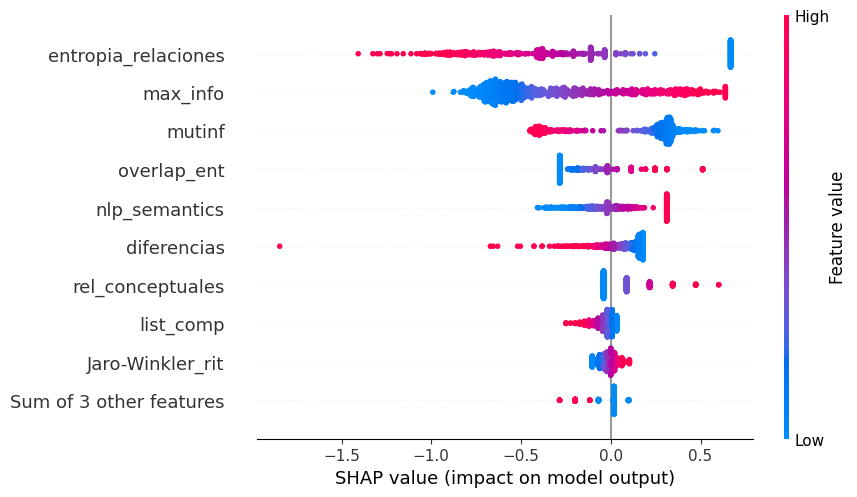

In [77]:
shap.plots.beeswarm(shap_values)

In [80]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(X_train, mode="regression", feature_names= train.columns[:-1])
explainer

In [88]:
y_test

[1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,


In [89]:
idx = 0

print("Prediction : ", model.predict(X_test[idx].reshape(1,-1)))
print("Actual :     ", y_test[idx])

explanation = explainer.explain_instance(X_test[idx], model.predict, num_features=len(train.columns[:-1]))
explanation

Prediction :  [1]
Actual :      1


In [90]:
explanation.show_in_notebook()


[0.68081791 0.59955345 0.15516437 0.52520987 0.22222222 0.10227273
 0.57513784 0.75       0.44444444 0.375      1.         0.07692308] 0 0


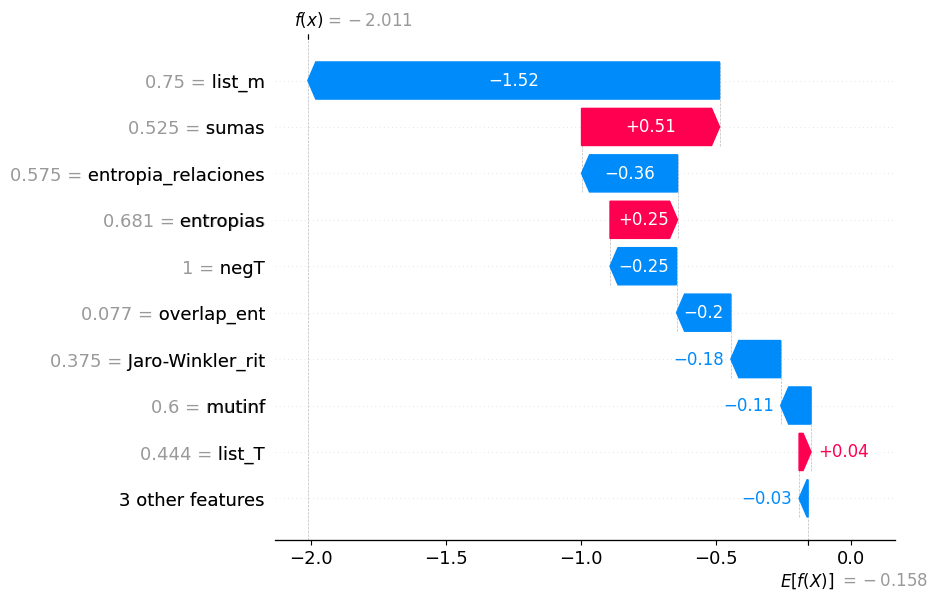

In [78]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [79]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.54302209 0.60474253 0.17500186 0.42002116 0.22222222 0.03409091
 0.74290159 0.57142857 0.44444444 0.57142857 0.         0.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

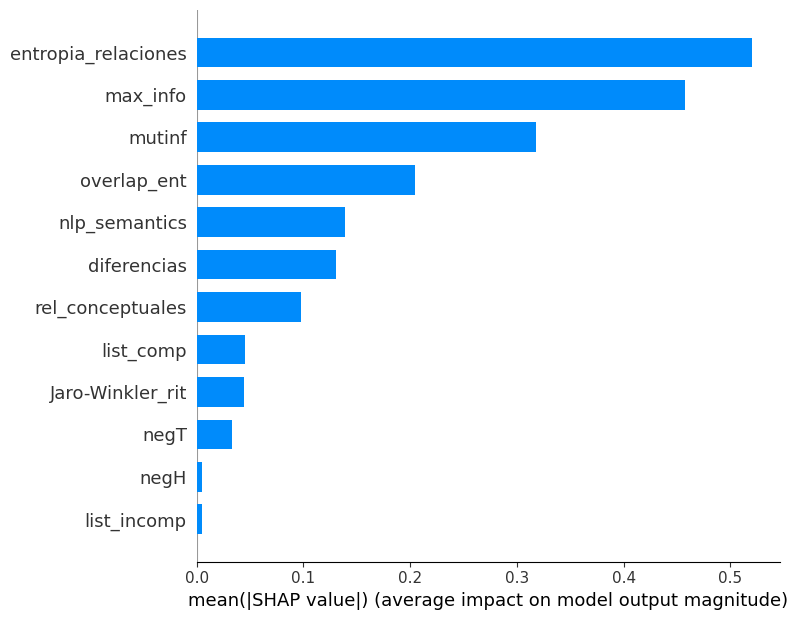

In [91]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

In [ ]:
['sumas', 'distancias', 'entropia_total', 'mutinf','mearts', 'max_info',  'diferencias', 'list_M', 'list_m', 'Jaro-Winkler_rit','overlap_ent']

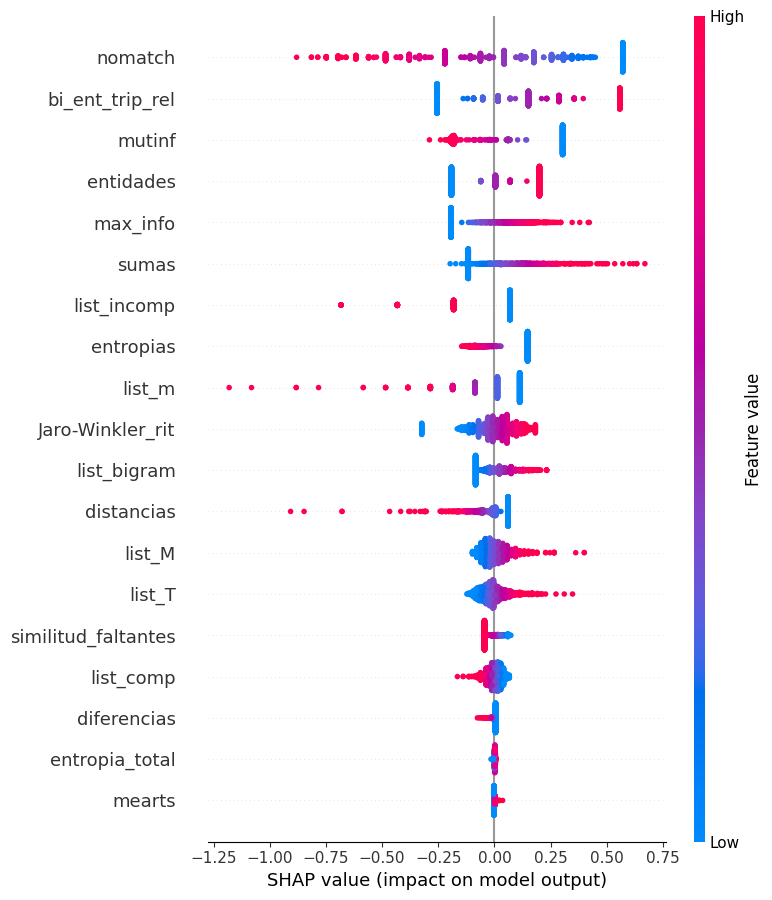

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

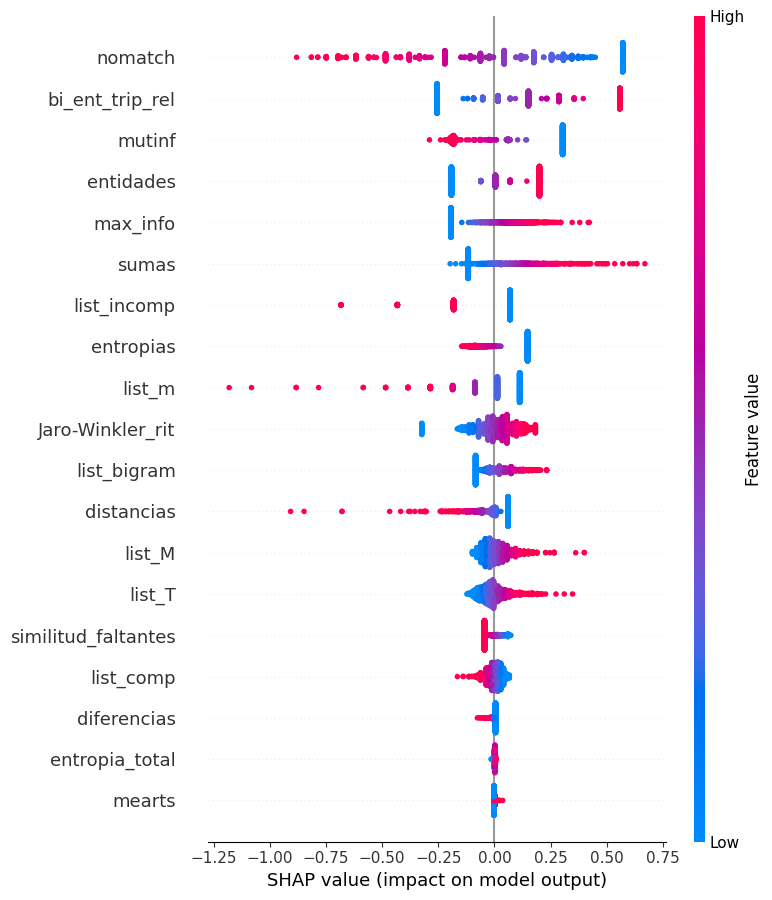

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

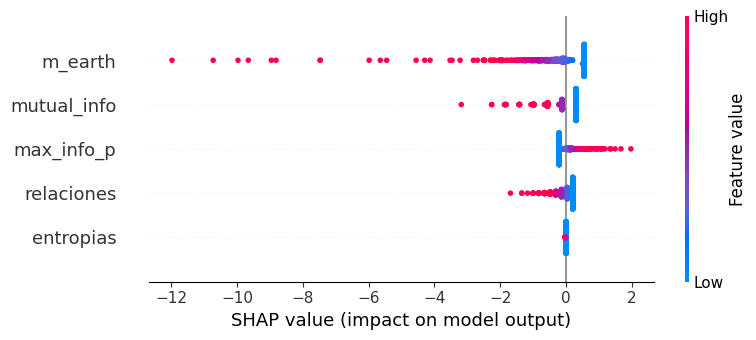

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [448]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [449]:
y_train.count(1)

412

In [450]:
y_train.count(0)

388

In [451]:
# y_trainC=[]
# for j in range(len(y_train)):
#     if y_train[j]==1:
#         y_trainC.append("entailment")
#     else:
#         y_trainC.append("not_entailment")

In [452]:
print(len(y_train))
print(len(y_trainC))

800
800


In [453]:
y_trainC.count("not_entailment")

388

In [454]:
y_train.count(0)

388

In [455]:
# y_testC=[]
# for j in range(len(y_test)):
#     if y_test[j]==1:
#         y_testC.append("entailment")
#     else:
#         y_testC.append("not_entailment")

In [456]:
print(len(y_test))
print(len(y_testC))

800
800


In [457]:
y_testC.count("not_entailment")

401

In [458]:
y_test.count(0)

401

In [459]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [460]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,

In [461]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))# 
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.72
precision:  0.79
recall 0.58
f1_score:  0.67
matthews_score:  0.45


In [462]:
validation_size = 0.10
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [463]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.790000 (0.039461)
DecisionTree: 0.790000 (0.061346)
DecisionTree: 0.820000 (0.053830)
DecisionTree: 0.810000 (0.036024)


In [464]:
print(cv_results)

[0.82926829 0.82352941 0.74647887 0.81818182 0.78911565 0.81889764
 0.76623377 0.81538462 0.85185185 0.875     ]


In [465]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[340,  61],
       [166, 233]])

In [466]:
c

Index(['distancias', 'mutinf', 'max_info', 'diferencias', 'Jaro-Winkler_rit',
       'overlap_ent'],
      dtype='object')

In [467]:
from sklearn import tree

In [468]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.26
|   |--- feature_0 <= 0.01
|   |   |--- feature_4 <= 0.30
|   |   |   |--- feature_4 <= 0.16
|   |   |   |   |--- feature_5 <= 0.98
|   |   |   |   |   |--- feature_5 <= 0.42
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  0.42
|   |   |   |   |   |   |--- feature_5 <= 0.57
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  0.57
|   |   |   |   |   |   |   |--- feature_5 <= 0.76
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_5 >  0.76
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  0.98
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.16
|   |   |   |   |--- feature_5 <= 0.46
|   |   |   |   |   |--- feature_4 <= 0.21
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  0.21
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.46
|   |   |   |   |   |--- feature_4 <= 0.24


Profundidad del árbol: 17
Número de nodos terminales: 267


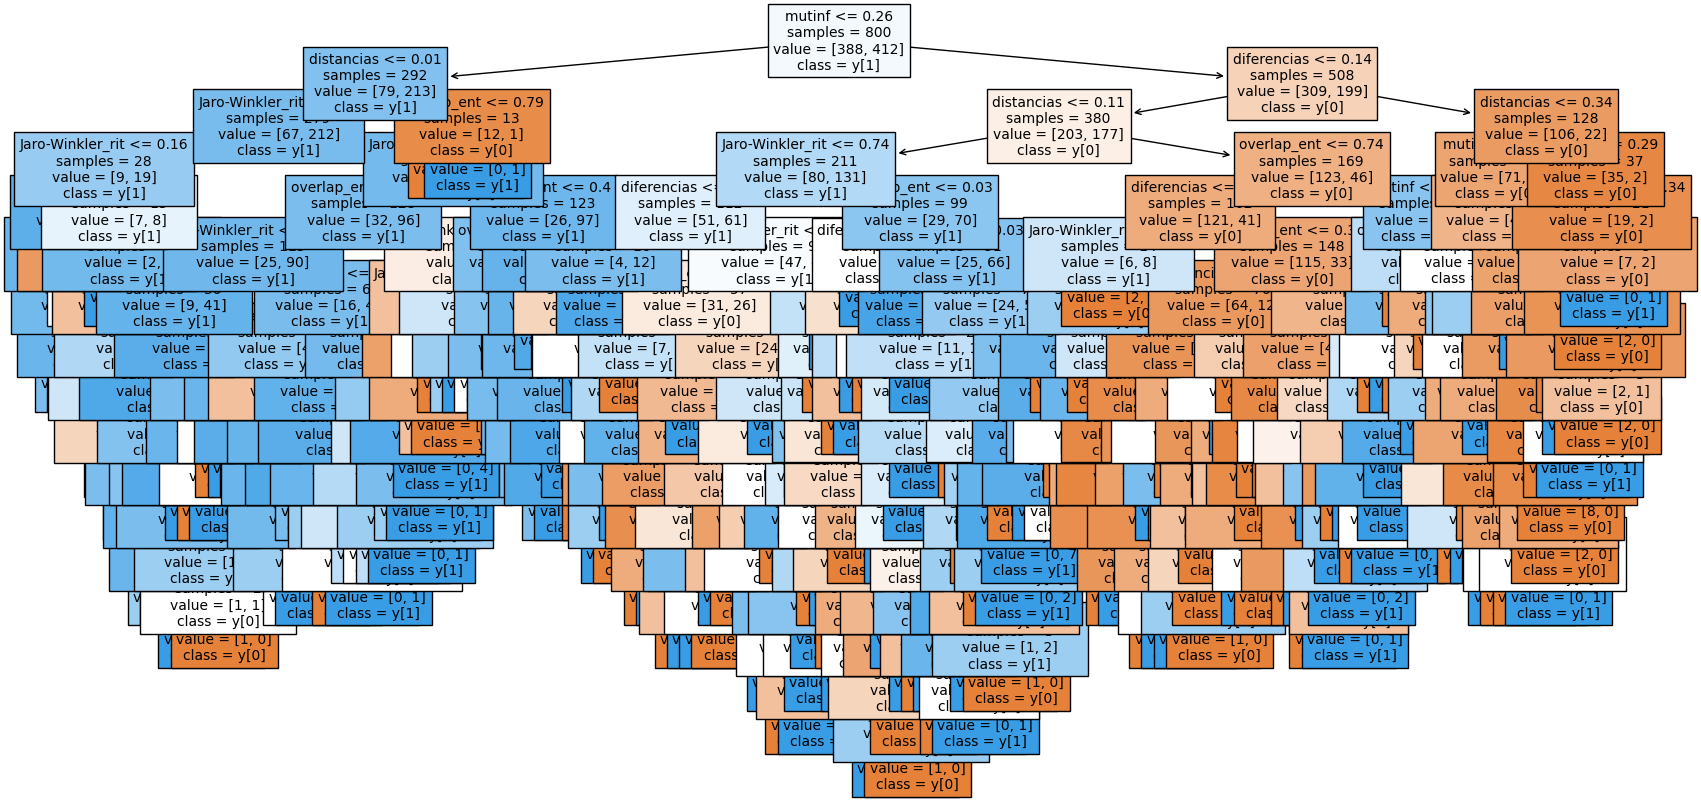

In [469]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )